<a href="https://colab.research.google.com/github/stmulugheta/Introduction-to-Web-Scraping/blob/main/EDA_food_tech_sales_data_ps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Connect to gdrive - after you add a short to the share folder for Omdena-FoodTech share folder:

https://drive.google.com/drive/folders/1i0d0dunkx6Lq_XszB-yiXc46yYENuB0S?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import libraries

In [ ]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#### Load data and check columns

In [ ]:
baseFolder = "/content/drive/MyDrive/Official_Folder_Omdena_FoodTech"
df_sales = pd.read_csv(os.path.join(baseFolder, '3_Data','sales_data.csv'), index_col=0)
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48564 entries, 0 to 2555
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48564 non-null  object
 1   product_id  48564 non-null  object
 2   store_id    48564 non-null  object
 3   sales       48564 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
# columns in the data
df_sales.columns

Index(['date', 'product_id', 'store_id', 'sales'], dtype='object')

In [ ]:
df_sales.head()

,date,product_id,store_id,sales
0,2020-01-01,p39288641,s603,122
1,2020-01-01,p39288641,s703,64
2,2020-01-01,p39288641,s803,25
3,2020-01-01,p39288641,s903,8
4,2020-01-01,p39288641,s453,154


In [ ]:
# unique sales - dates
print(df_sales.date.unique())

In [ ]:
print("max date          min date")
df_sales.date.max(), df_sales.date.min()

max date          min date


('2021-09-30', '2020-01-01')

In [ ]:
# unique store_id (s)
print(df_sales.store_id.unique())

['s603' 's703' 's803' 's903' 's453' 's895' 's417']


In [ ]:
# some stats
df_sales.describe()

,sales
count,48564.000000
mean,41.726258
std,45.410794
min,0.000000
25%,9.000000
50%,23.000000
75%,61.000000
max,335.000000


####Visualize

####Plot by product_id

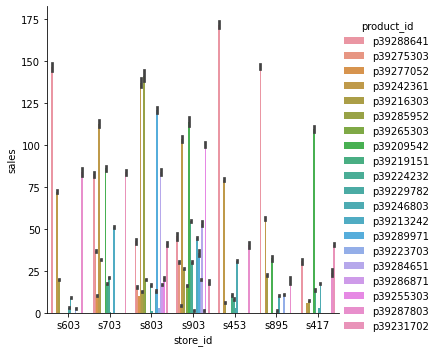

In [ ]:
sns.catplot(x = "store_id",       # x var name
            y = "sales",       # y var name
            hue = "product_id",  # group variable name
            data = df_sales,     # data to plot
            kind = "bar")


####Groupby 'store_id' & 'product_id' and calculate the total sales as 'total_sales' and plot

In [ ]:
df_grp = df_sales.groupby(['store_id', 'product_id'])['sales'].sum().reset_index().rename(columns={"sales":"total_sales"})
df_grp.head()

,store_id,product_id,total_sales
0,s417,p39209542,69981
1,s417,p39216303,4622
2,s417,p39219151,8842
3,s417,p39229782,2000
4,s417,p39231702,26010


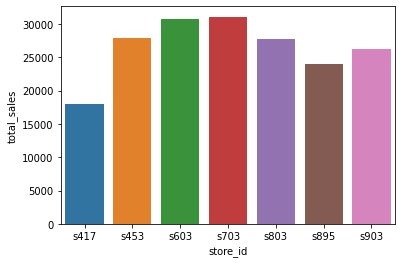

In [ ]:
ax = sns.barplot(x='store_id', y='total_sales', data=df_grp,
                 ci=None)